1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [18]:
#imports
import numpy as np
import pandas as pd
from scipy import stats
from numpy import random
import matplotlib.pyplot as plt
import statistics

Text(0.5, 1.0, 'Decay of 1000 Tl atoms')

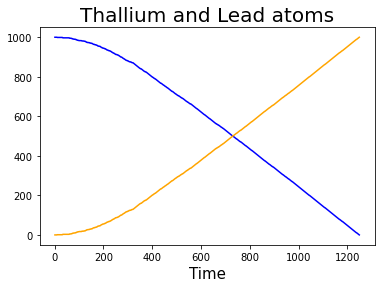

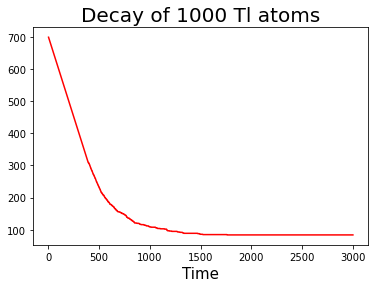

In [19]:
#Evolution of decay - p1

def probability_f(t, tau):
    return 1-2**(-t/tau)

tau = 3.052*60
tl = 1000
pb = 0
t = 0
thallium = []
lead = []
time = []

while tl > 0:
    randvalue = random.rand()
    if randvalue < probability_f(t, tau):
        tl = tl-1
        pb += 1
    t += 1
    time.append(t)
    thallium.append(tl)
    lead.append(pb)
#
plt.figure(figsize=(6,4))
plt.subplot()
plt.xlabel('Time', fontsize = 15)
plt.plot(time, thallium, color = 'blue')
plt.plot(time, lead, color = 'orange')  
plt.title('Thallium and Lead atoms', fontsize = 20)

#Evolution of decay -p2

def probability_f_pdf(t, tau):
    """PDF of probability_f."""
    return (2**(-t/tau))*(np.log(2)/tau)

tl2 = 700
t2 = 0
thallium2 = []
time2 = []

while (tl2 > 0 and t2 < 3000):
    randvalue = random.rand()
    if randvalue < (probability_f_pdf(t2, tau)*1000):
        tl2 = tl2-1
    #print(random_number, (probability_f_pdf(t2, tau)*1000))
    t2 += 1
    time2.append(t2)
    thallium2.append(tl2)
        
plt.figure(figsize=(6,4))
plt.subplot()
plt.plot(time2, thallium2, color = 'red')
plt.xlabel('Time', fontsize = 15)
plt.title('Decay of 1000 Tl atoms', fontsize = 20)

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral with the hit/miss method = 1.368

Mean = 1.3462

Standard Deviation = 0.021867

Error = 0.0218

Integral with the mean value method = 1.347

Error = 0.00076502


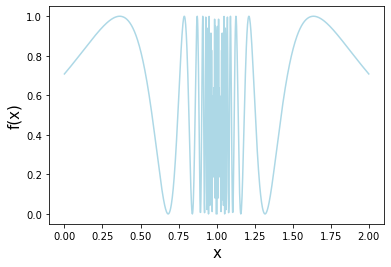

In [20]:
def f(x):
    return (np.sin(1. / (1 - x)))**2

x = np.linspace(0.000, 2.000, 1000)
plt.plot(x, f(x), color = 'lightblue')
plt.xlabel('x', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)

values_for_std = []
for i in range(30):
    N = 1000
    count = 0
    for i in range(N):
        x = 2 * np.random.random()
        y = 1 * np.random.random()
        if y < f(x): count += 1
    I1 = 2*count / N
    values_for_std.append(I1)
    
print("Integral with the hit/miss method = {:.5}".format(I1))

mu = statistics.mean(values_for_std)
sigma = statistics.stdev(values_for_std)
print('\nMean = {:.5}'.format(mu))
print('\nStandard Deviation = {:.5}'.format(sigma))
print('\nError = {:.5}'.format(abs(I1-mu)))

Ν = 100000000
a = 0
b = 2
x = np.random.uniform(a,b,Ν)
I2 = np.mean(f(x)*(b-a))

print('\nIntegral with the mean value method = {:.5}'.format(I2))
print('\nError = {:.5}'.format(abs(I2-mu)))

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [21]:
def f(x,y):
    if ((x**2)+(y**2) < 1): return 1
    else: return 0

N = 100000 #iteration
count = 0

#1)

for i in range(N):
    x = np.random.random() # x is random uniform between 0 and 1
    y = np.random.random() # y is random uniform between 0 and 1
    if y <= f(x,y): count += 1
I1 = 4 * (count / N) # area of the first quadrant * 4
print("Integral of the circle:", I1)

#2) 10D sphere

d = 10 
counter = 0
for i in range(N):
    point = np.random.uniform(-1.0, 1.0, d)
    distance = np.linalg.norm(point)
    if distance <= 1.0:
        counter += 1
I2 = np.power(2.0, d) * (counter / N)
print("Integral of the 10D sphere:", I2)


Integral of the circle: 3.1514
Integral of the 10D sphere: 2.68288


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

True integral: 2.866515719235352e-07
IS integral: 2.8528003643496465e-07 , rel err: 0.004784678065314769


<ipython-input-22-36843f21074e>:5: RuntimeWarning: divide by zero encountered in power
  return (x**(-1/2))/(np.exp(x)+1)
<ipython-input-22-36843f21074e>:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.sqrt(x)


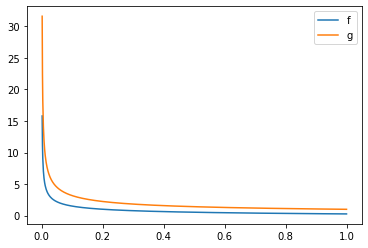

In [22]:
def w(x):
    return 1/np.sqrt(x)

def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

x = np.linspace(0, 1, 1000)
plt.plot(x, f(x), label='f')
plt.plot(x, w(x), label='g')
plt.legend()

%precision 10
h_true = 1 - stats.norm().cdf(5)
print("True integral:", h_true)

n = 10000 # notice we are generating 10k random numbers instead of 10M
y = stats.expon(loc=5).rvs(n)
h_is = 1.0 / n * np.sum(stats.norm().pdf(y) / stats.expon(loc=5).pdf(y))
# estimate and relative error
print("IS integral:", h_is, ", rel err:", np.abs(h_is - h_true)/h_true)
